In [247]:
import pandas as pd
import openpyxl
file_path = r'C:/Users/emanu/Downloads/Player_dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='RPE + GPS High Speed Running')
print(df.head())

      IDNR  Sectorial_Position  Specific_Position  Time_Session_1  RPE_1  \
0  2111115                   1                  1             NaN    NaN   
1  2111118                   1                  1             NaN    NaN   
2  2111119                   1                  1             NaN    NaN   
3  2111282                   1                  1             NaN    NaN   
4  2121155                   1                  1             NaN    NaN   

   S_RPE_1  Time_Session_2  RPE_2  S_RPE_2  Time_Session_3  ...  HSR_Week_41  \
0      NaN             NaN    NaN      NaN            96.0  ...         7.53   
1      NaN             NaN    NaN      NaN            96.0  ...         0.00   
2      NaN             NaN    NaN      NaN            96.0  ...        90.55   
3      NaN             NaN    NaN      NaN             NaN  ...        39.80   
4      NaN             NaN    NaN      NaN             NaN  ...        26.99   

   Part_Match_33_Championship  Time_Match_33_Championship  \
0

In [248]:
columns_to_keep = df.filter(regex='^(IDNR|Sectorial_Position|Specific_Position|Time_Session_|RPE_|S_RPE_|S_RPE_Week_)').columns
training_data = df[columns_to_keep]

training_data

,IDNR,Sectorial_Position,Specific_Position,Time_Session_1,RPE_1,S_RPE_1,Time_Session_2,RPE_2,S_RPE_2,Time_Session_3,...,RPE_209,S_RPE_209,S_RPE_Week_41,Time_Session_210,RPE_210,S_RPE_210,Time_Session_211,RPE_211,S_RPE_211,S_RPE_Week_42
0,2111115,1,1,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,4.0,288.0,909,41.0,1.0,41.0,20.0,1.0,20.0,61
1,2111118,1,1,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2111119,1,1,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,4.0,288.0,1924,41.0,1.0,41.0,36.0,3.0,108.0,149
3,2111282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,144.0,851,55.0,2.0,110.0,41.0,2.0,82.0,192
4,2121155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,288.0,1388,41.0,1.0,41.0,36.0,1.0,36.0,77
5,2141120,1,1,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,3.0,216.0,1737,70.0,8.0,560.0,41.0,5.0,205.0,765
6,2211117,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,144.0,649,41.0,1.0,41.0,36.0,2.0,72.0,113
7,2211193,1,2,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,1.0,72.0,1092,70.0,5.0,350.0,41.0,3.0,123.0,473
8,2211228,1,2,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,4.0,288.0,1282,41.0,1.0,41.0,36.0,3.0,108.0,149
9,2211283,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,144.0,1151,70.0,2.0,140.0,41.0,2.0,82.0,222


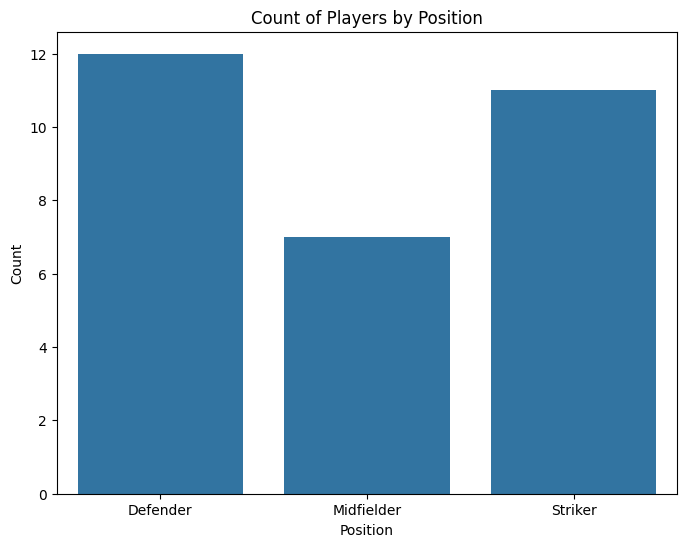

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
sectorial_mapping = {
    1: 'Defender',
    2: 'Midfielder',
    3: 'Striker'
}

df['Position'] = df['Sectorial_Position'].map(sectorial_mapping)

# Visualizza il conteggio dei giocatori per ciascuna categoria
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Count of Players by Position')
plt.show()

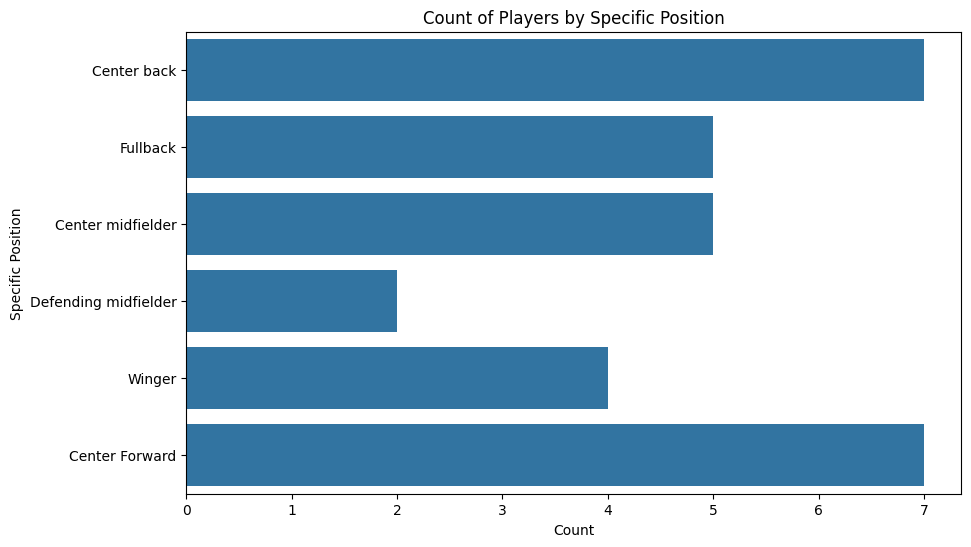

In [250]:
position_mapping = {
    1: 'Center back',
    2: 'Fullback',
    3: 'Defending midfielder',
    4: 'Center midfielder',
    5: 'Winger',
    6: 'Center Forward'
}
df['Position'] = df['Specific_Position'].map(position_mapping)

# Visualizza il conteggio dei giocatori per ciascun ruolo specifico
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Position')
plt.xlabel('Count')
plt.ylabel('Specific Position')
plt.title('Count of Players by Specific Position')
plt.show()

In [251]:
column_names = training_data.columns.tolist()
print(column_names)

['IDNR', 'Sectorial_Position', 'Specific_Position', 'Time_Session_1', 'RPE_1', 'S_RPE_1', 'Time_Session_2', 'RPE_2', 'S_RPE_2', 'Time_Session_3', 'RPE_3', 'S_RPE_3', 'Time_Session_4', 'RPE_4', 'S_RPE_4', 'Time_Session_5', 'RPE_5', 'S_RPE_5', 'Time_Session_6', 'RPE_6', 'S_RPE_6', 'Time_Session_7', 'RPE_7', 'S_RPE_7', 'S_RPE_Week_1', 'Time_Session_8', 'RPE_8', 'S_RPE_8', 'Time_Session_9', 'RPE_9', 'S_RPE_9', 'Time_Session_10', 'RPE_10', 'S_RPE_10', 'Time_Session_11', 'RPE_11', 'S_RPE_11', 'Time_Session_12', 'RPE_12', 'S_RPE_12', 'S_RPE_Week_2', 'Time_Session_13', 'RPE_13', 'S_RPE_13', 'Time_Session_14', 'RPE_14', 'S_RPE_14', 'Time_Session_15', 'RPE_15', 'S_RPE_15', 'Time_Session_16', 'RPE_16', 'S_RPE_16', 'Time_Session_17', 'S_RPE_17', 'Time_Session_18', 'RPE_18', 'S_RPE_18', 'S_RPE_Week_3', 'Time_Session_19', 'RPE_19', 'S_RPE_19', 'Time_Session_20', 'RPE_20', 'S_RPE_20', 'Time_Session_21', 'RPE_21', 'S_RPE_21', 'Time_Session_22', 'RPE_22', 'S_RPE_22', 'Time_Session_23', 'RPE_23', 'S_RPE

In [252]:
import pandas as pd
weekly_dfs = []

start_idx = 0
for idx, col in enumerate(training_data.columns):
    if col.startswith('S_RPE_Week_'):
        week_df = training_data.iloc[:, :idx+1]
        weekly_dfs.append(week_df)
        start_idx = idx + 1

week_df = training_data.iloc[:, :start_idx]
weekly_dfs.append(week_df)

In [253]:
#iteration to access
for i, week_df in enumerate(weekly_dfs):
    globals()[f"week_{i+1}_df"] = week_df
#example
week_1_df

,IDNR,Sectorial_Position,Specific_Position,Time_Session_1,RPE_1,S_RPE_1,Time_Session_2,RPE_2,S_RPE_2,Time_Session_3,...,Time_Session_5,RPE_5,S_RPE_5,Time_Session_6,RPE_6,S_RPE_6,Time_Session_7,RPE_7,S_RPE_7,S_RPE_Week_1
0,2111115,1,1,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,91.0,3.0,273.0,110.0,4.0,440.0,NaN,NaN,NaN,1417
1,2111118,1,1,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,NaN,NaN,NaN,110.0,4.0,440.0,NaN,NaN,NaN,1440
2,2111119,1,1,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,NaN,NaN,NaN,110.0,3.0,330.0,NaN,NaN,NaN,1138
3,2111282,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2121155,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,2141120,1,1,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,91.0,4.0,364.0,110.0,3.0,330.0,NaN,NaN,NaN,1806
6,2211117,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,110.0,3.0,330.0,NaN,NaN,NaN,1058
7,2211193,1,2,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,91.0,3.0,273.0,110.0,4.0,440.0,NaN,NaN,NaN,1921
8,2211228,1,2,NaN,NaN,NaN,NaN,NaN,NaN,96.0,...,91.0,5.0,455.0,110.0,4.0,440.0,NaN,NaN,NaN,1895
9,2211283,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [254]:
# example of logic for the first week
week_1_df.update(week_1_df.filter(like='S_RPE_').fillna(0))
weekly_acute_load = week_1_df.filter(like='S_RPE_').sum(axis=1)
num_sessions = week_1_df.filter(like='S_RPE_').count(axis=1)
mean_weekly_acute_load = weekly_acute_load / num_sessions
variation_within_sessions = weekly_acute_load.std()
monotony = mean_weekly_acute_load / variation_within_sessions
weekly_strain = weekly_acute_load * monotony
data = {
    "Player ID": week_1_df["IDNR"],
    "Weekly Acute Load": weekly_acute_load,
    "Training Strain": weekly_strain,
    "Training Monotony": monotony
}
workload_df = pd.DataFrame(data)

print(workload_df) 

    Player ID  Weekly Acute Load  Training Strain  Training Monotony
0     2111115             2834.0       622.192089           0.219546
1     2111118             2880.0       642.554202           0.223109
2     2111119             2276.0       401.300137           0.176318
3     2111282                0.0         0.000000           0.000000
4     2121155                0.0         0.000000           0.000000
5     2141120             3612.0      1010.695370           0.279816
6     2211117             2116.0       346.861517           0.163923
7     2211193             3842.0      1143.508807           0.297634
8     2211228             3790.0      1112.764373           0.293605
9     2211283                0.0         0.000000           0.000000
10    3111122             3476.0       936.018276           0.269280
11    3111127             2406.0       448.452076           0.186389
12    3111230                0.0         0.000000           0.000000
13    3141162             6480.0  

In [255]:
#we made the process into iterative

previous_weekly_acute_load = 0  
previous_num_sessions = 0  
workload_dfs = {}  
previous_last_column_index = 0  

for week_number in range(1, 43):  # Weeks 1 to 42
    week_df_name = f'week_{week_number}_df'
    week_df = eval(week_df_name)  

    columns_to_drop = [col for col in week_df.columns if col.startswith('S_RPE_Week_')]
    week_df.drop(columns=columns_to_drop, inplace=True)
    week_df.update(week_df.filter(like='S_RPE_').fillna(0))

    weekly_acute_load = week_df.filter(like='S_RPE_').sum(axis=1)
    week_over_week_load_change = weekly_acute_load - previous_weekly_acute_load  
    current_num_sessions = week_df.filter(like='S_RPE_').count(axis=1)
    
    if week_number == 1:
        num_sessions = current_num_sessions  
    else:
        num_sessions = current_num_sessions - previous_num_sessions  
    
    mean_weekly_acute_load = week_over_week_load_change / num_sessions.replace(0, pd.NA)  
    s_rpe =  week_df.filter(like='S_RPE_')
    columns_to_consider = s_rpe.columns[previous_last_column_index:]
    
    if len(columns_to_consider) > 0:
        variation_within_sessions = s_rpe[columns_to_consider].std(axis=1)
    else:
        variation_within_sessions = pd.Series([0] * len(s_rpe.index), index=s_rpe.index)  

    if len(s_rpe.columns) > 0:
        previous_last_column_index = len(s_rpe.columns)

    monotony = mean_weekly_acute_load / variation_within_sessions.replace(0, pd.NA)
    weekly_strain = week_over_week_load_change * monotony
    
    previous_weekly_acute_load = weekly_acute_load
    previous_num_sessions = current_num_sessions

    data = {
        "Player ID": week_df["IDNR"],
        "Weekly Acute Load": week_over_week_load_change,
        "Mean Weekly Acute Load": mean_weekly_acute_load,
        "Number of Sessions Weekly": num_sessions,
        "Variation Between Sessions": variation_within_sessions,
        "Training Monotony": monotony,
        "Training Strain": weekly_strain
    }
    workload_df = pd.DataFrame(data)
    
    workload_dfs[week_number] = workload_df
for week_number, workload_df in workload_dfs.items():
    workload_dfs[week_number] = workload_df.fillna(0)

C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\1158584870.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  workload_dfs[week_number] = workload_df.fillna(0)


In [256]:
#example on a how a weekly report df looks like, the counter system start by 1 in this case so you can call according to the week you are interested to
workload_dfs[42]

,Player ID,Weekly Acute Load,Mean Weekly Acute Load,Number of Sessions Weekly,Variation Between Sessions,Training Monotony,Training Strain
0,2111115,61.0,30.5,2,14.849242,2.053977,125.292587
1,2111118,0.0,0.0,2,0.000000,0.000000,0.000000
2,2111119,149.0,74.5,2,47.376154,1.572521,234.305637
3,2111282,192.0,96.0,2,19.798990,4.848732,930.956585
4,2121155,77.0,38.5,2,3.535534,10.889444,838.487221
5,2141120,765.0,382.5,2,251.022907,1.523765,1165.680468
6,2211117,113.0,56.5,2,21.920310,2.577518,291.259564
7,2211193,473.0,236.5,2,160.513239,1.473399,696.917591
8,2211228,149.0,74.5,2,47.376154,1.572521,234.305637
9,2211283,222.0,111.0,2,41.012193,2.706512,600.845700


In [257]:
#make the dataset adaptable to plot it in time series
dfs_list = []

for week_number, df in workload_dfs.items():
    df['Week'] = week_number  
    dfs_list.append(df)
all_weeks_df = pd.concat(dfs_list, ignore_index=True)
all_weeks_df.set_index(['Player ID', 'Week'], inplace=True)
all_weeks_df.sort_index(inplace=True)

In [258]:
all_weeks_df.reset_index(inplace=True)

all_weeks_df

,Player ID,Week,Weekly Acute Load,Mean Weekly Acute Load,Number of Sessions Weekly,Variation Between Sessions,Training Monotony,Training Strain
0,2111115,1,1417.0,202.428571,7,198.866670,1.017911,1442.379892
1,2111115,2,1063.0,212.600000,5,214.933245,0.989144,1051.460418
2,2111115,3,0.0,0.000000,6,0.000000,0.000000,0.000000
3,2111115,4,0.0,0.000000,7,0.000000,0.000000,0.000000
4,2111115,5,579.0,96.500000,6,149.644579,0.644861,373.374702
...,...,...,...,...,...,...,...,...
1255,6131189,38,0.0,0.000000,3,0.000000,0.000000,0.000000
1256,6131189,39,390.0,78.000000,5,174.413302,0.447214,174.413302
1257,6131189,40,0.0,0.000000,3,0.000000,0.000000,0.000000
1258,6131189,41,0.0,0.000000,6,0.000000,0.000000,0.000000


In [259]:
output_path = r'C:\Users\emanu\Downloads\Output Task 1\all_weeks_df.xlsx'
all_weeks_df.to_excel(output_path, index=False)
print(f"all_weeks_df saved to: {output_path}")

all_weeks_df saved to: C:\Users\emanu\Downloads\Output Task 1\all_weeks_df.xlsx


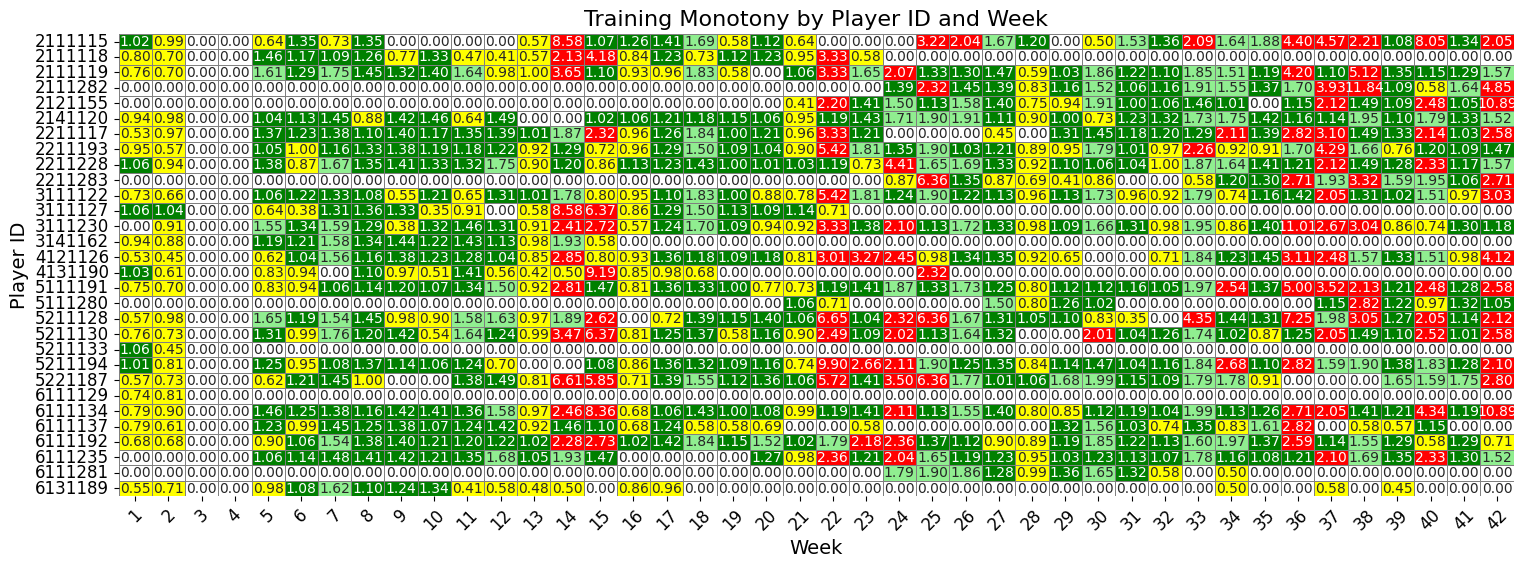

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

pivot_df = all_weeks_df.pivot(index='Player ID', columns='Week', values='Training Monotony')

colors = ['white', 'yellow', 'green', 'lightgreen', 'red']
cmap = ListedColormap(colors)

boundaries = [0, 0.01, 1, 1.5, 2, np.inf]
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

plt.figure(figsize=(18, 6))
sns.heatmap(pivot_df, annot=True, cmap=cmap, norm=norm, cbar=False, linewidths=.5, linecolor='grey', annot_kws={"size": 10}, fmt=".2f")

plt.title('Training Monotony by Player ID and Week', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Player ID', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

plt.show()


In [261]:
pivot_df = all_weeks_df.pivot(index='Player ID', columns='Week', values='Training Strain')
pivot_df2 = all_weeks_df.pivot(index='Player ID', columns='Week', values='Weekly Acute Load')
result_df = pivot_df.div(pivot_df2)
result_df = result_df.fillna(0)

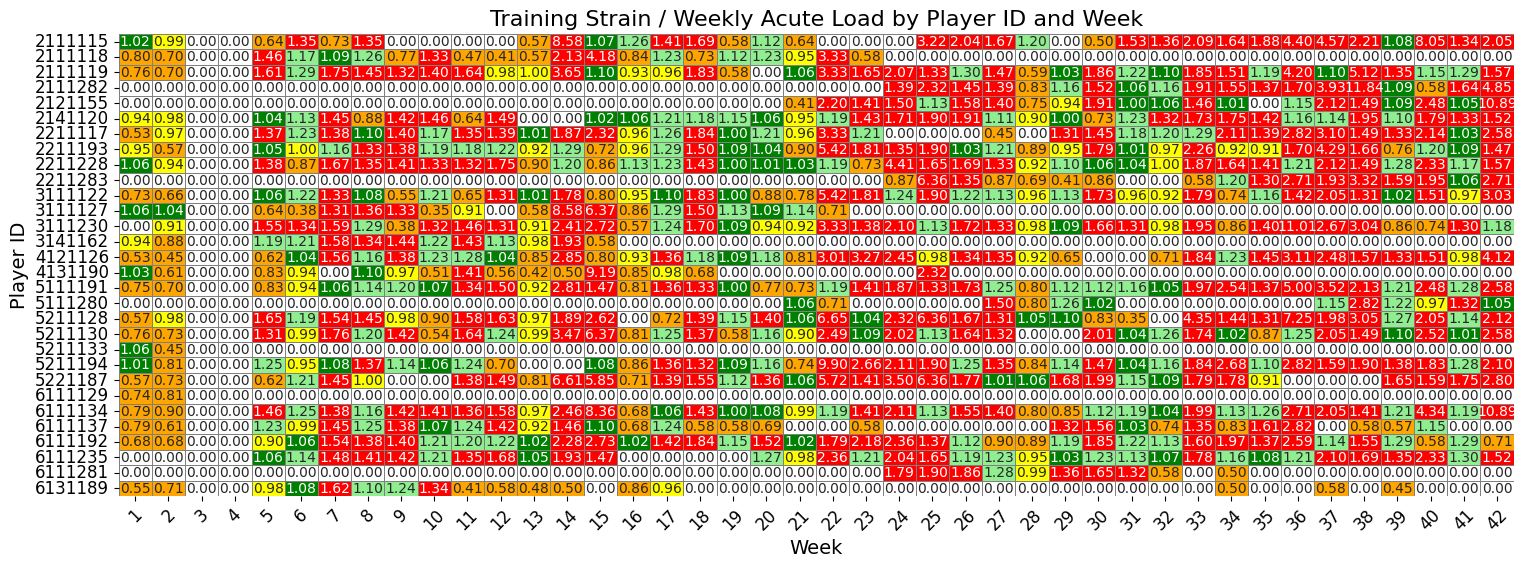

In [262]:
colors = ['white', 'orange', 'yellow', 'green','lightgreen', 'red']
cmap = ListedColormap(colors)
boundaries = [0, 0.01, 0.9, 1, 1.1, 1.3, np.inf] 
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

plt.figure(figsize=(18, 6))
sns.heatmap(result_df, annot=True, cmap=cmap, norm=norm, cbar=False, linewidths=.5, linecolor='grey', annot_kws={"size": 10}, fmt=".2f")

plt.title('Training Strain / Weekly Acute Load by Player ID and Week', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Player ID', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

plt.show()



In [264]:
rpe_filtered_columns = [col for col in week_df.columns if col.startswith('IDNR') or col.startswith('RPE_') and not col.startswith('S_RPE_Week_')]
s_rpe_filtered_columns = [col for col in week_df.columns if col.startswith('IDNR') or col.startswith('S_RPE_') and not col.startswith('S_RPE_Week_')]


In [265]:
rpe = training_data[rpe_filtered_columns]
rpe.fillna(0, inplace=True)
s_rpe = training_data[s_rpe_filtered_columns]
s_rpe.fillna(0, inplace=True)

C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\1751891739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpe.fillna(0, inplace=True)
C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\1751891739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_rpe.fillna(0, inplace=True)


I want to see how each player thinks about his fatigue overload, So I'll compare the RPE with S_RPE over time 

In [266]:
import os
output_directory = r'C:\Users\emanu\Downloads\Output Task 1'
os.makedirs(output_directory, exist_ok=True)
file_paths = []

for index, (rpe_row, s_rpe_row) in enumerate(zip(rpe.iterrows(), s_rpe.iterrows())):
    rpe_values = rpe_row[1].values[1:]  
    s_rpe_values = s_rpe_row[1].values[1:] 

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(rpe_values) + 1), rpe_values, label='RPE', color='blue')
    plt.xlabel('Time (Column Count)')
    plt.ylabel('RPE', color='blue')
    plt.grid(True)

    plt.twinx()

    plt.plot(range(1, len(s_rpe_values) + 1), s_rpe_values, label='S_RPE', color='red')
    plt.ylabel('S_RPE (scaled)', color='red')

    plt.title(f'RPE and S_RPE Plot for Player {index+1}')
    plt.grid(True)

    plt.legend()

    file_path = os.path.join(output_directory, f'rpe_and_s_rpe_plot_{index+1}.png')
    plt.savefig(file_path)
    
    file_paths.append(file_path)

    plt.close()  

# Combine all saved plots into a single HTML page
html_content = '<!DOCTYPE html><html><head><title>RPE and S_RPE Plots</title></head><body>'
for file_path in file_paths:
    html_content += f'<img src="{file_path}" alt="RPE and S_RPE Plot"><br>'
html_content += '</body></html>'

html_file_path = os.path.join(output_directory, 'rpe_and_s_rpe_plots.html')
with open(html_file_path, 'w') as html_file:
    html_file.write(html_content)

print(f'Plots and HTML file saved to: {output_directory}')


Plots and HTML file saved to: C:\Users\emanu\Downloads\Output Task 1


In [267]:
filtered_columns = ['IDNR'] + [col for col in df.columns if col.startswith('HSR_') and not (col.startswith('HSR_Week_') or col.startswith('HSR_Match'))]
hsr_df = df[filtered_columns]
hsr_df = hsr_df.fillna(0)

KeyError: "None of [Index(['IDNR'], dtype='object')] are in the [columns]"

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for index, row in hsr_df.iterrows():
    player_id = row['IDNR']
    hsr_values = row.values[1:]  

    x_values = list(range(1, len(hsr_values) + 1))
    
    fig.add_trace(go.Scatter(x=x_values, y=hsr_values, mode='lines+markers', name=f'Player {player_id}'))

fig.update_layout(
    title='HSR Values Over Time for All Players',
    xaxis_title='Time (Column Count)',
    yaxis_title='HSR',
    legend_title='Player ID'
)

output_file_path = 'C:/Users/emanu/Downloads/Output Task 1/combined_hsr_plot.html'
fig.write_html(output_file_path)

print(f'Combined interactive HSR plot for all players saved to: {output_file_path}')


Combined interactive HSR plot for all players saved to: C:/Users/emanu/Downloads/Output Task 1/combined_hsr_plot.html


In [ ]:
partecipation = df.filter(regex=r'^Part_|^IDNR')

In [ ]:
partecipation.set_index('IDNR', inplace=True)
partecipation

,Part_Match_1_Championship,Part_Match_2_Championship,Part_Match_3_Championship,Part_Match_4_Championship,Part_Match_5_Championship,Part_Match_6_Championship,Part_Match_7_Championship,Part_Match_1_Cup,Part_Match_8_Championship,Part_Match_9_Championship,...,Part_Match_25_Championship,Part_Match_26_Championship,Part_Match_27_Championship,Part_Match_28_Championship,Part_Match_29_Championship,Part_Match_30_Championship,Part_Match_31_Championship,Part_Match_32_Championship,Part_Match_33_Championship,Part_Match_34_Championship
IDNR,,,,,,,,,,,,,,,,,,,,,
2111115,1,1,1,1,1,1,1,0,0,0,...,1,1,0,1,1,1,1,1,1,1
2111118,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2111119,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
2111282,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,1
2121155,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1,1,0
2141120,0,0,1,1,1,1,1,1,1,1,...,0,1,1,0,0,0,0,0,0,1
2211117,1,1,0,0,1,1,1,1,0,0,...,0,1,0,0,1,1,1,1,1,0
2211193,0,1,1,1,0,0,0,1,1,1,...,1,1,1,0,1,1,1,0,0,1
2211228,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1


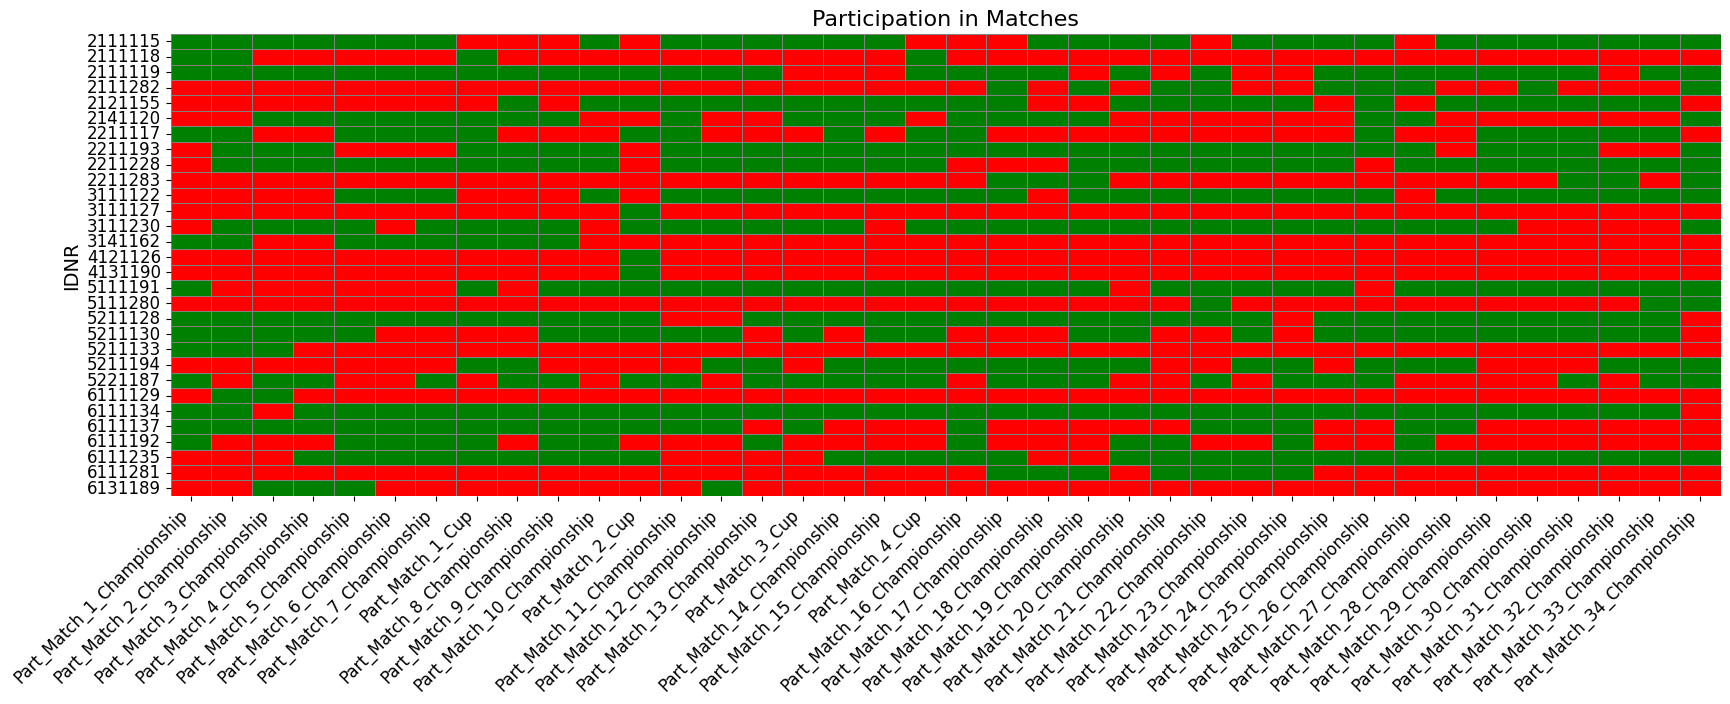

In [ ]:
cmap = ListedColormap(['red', 'green'])
plt.figure(figsize=(20, 6))  #
ax = sns.heatmap(partecipation, cmap=cmap, cbar=False, linewidths=0.5, linecolor='grey')
plt.title('Participation in Matches', fontsize=16)
plt.ylabel('IDNR', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha="right")  
plt.yticks(fontsize=12, rotation=0)

plt.show()

In [ ]:
partecipation.to_excel("C:/Users/emanu/Downloads/Output Task 1/participation.xlsx")

PermissionError: [Errno 13] Permission denied: 'C:/Users/emanu/Downloads/Output Task 1/participation.xlsx'

In [ ]:
partecipation.reset_index(inplace=True)
partecipation['Total_Participation'] = partecipation.eq(1).sum(axis=1)
partecipation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   IDNR                        30 non-null     int64
 1   Part_Match_1_Championship   30 non-null     int64
 2   Part_Match_2_Championship   30 non-null     int64
 3   Part_Match_3_Championship   30 non-null     int64
 4   Part_Match_4_Championship   30 non-null     int64
 5   Part_Match_5_Championship   30 non-null     int64
 6   Part_Match_6_Championship   30 non-null     int64
 7   Part_Match_7_Championship   30 non-null     int64
 8   Part_Match_1_Cup            30 non-null     int64
 9   Part_Match_8_Championship   30 non-null     int64
 10  Part_Match_9_Championship   30 non-null     int64
 11  Part_Match_10_Championship  30 non-null     int64
 12  Part_Match_2_Cup            30 non-null     int64
 13  Part_Match_11_Championship  30 non-null     int64
 14  Part_Match_1

C:\Users\emanu\AppData\Local\Temp\ipykernel_1908\2840688202.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We have a total of 38 Matchs, let's say how many each player played

C:\Users\emanu\AppData\Local\Temp\ipykernel_1908\3836956902.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



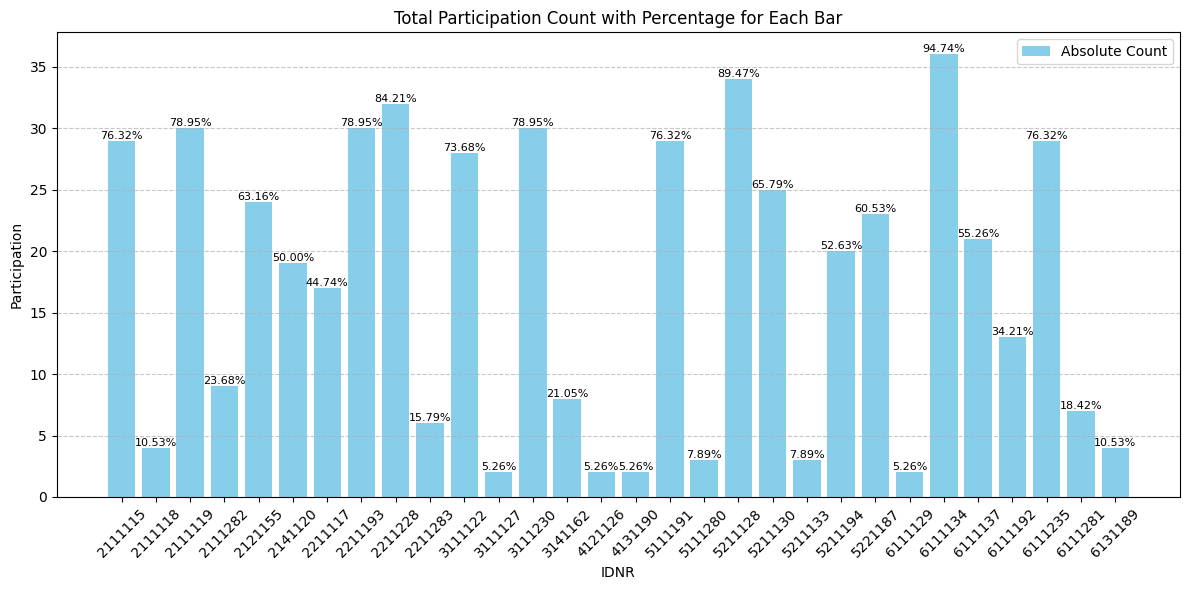

In [ ]:
total_matches = 38
partecipation.reset_index(drop=True, inplace=True)
partecipation['Total_Participation'] = partecipation.eq(1).sum(axis=1)
relative_values = (partecipation['Total_Participation'] / total_matches) * 100
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(partecipation)), partecipation['Total_Participation'], color='skyblue', label='Absolute Count')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{relative_values[i]:.2f}%", 
             ha='center', va='bottom', color='black', fontsize=8)

plt.xlabel('IDNR')
plt.ylabel('Participation')
plt.title('Total Participation Count with Percentage for Each Bar')
plt.xticks(range(len(partecipation)), partecipation['IDNR'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
time = df.filter(regex=r'^Time_Match|^IDNR')

In [ ]:
time.reset_index(inplace=True)
time

,IDNR,Time_Match_1_Championship,Time_Match_2_Championship,Time_Match_3_Championship,Time_Match_4_Championship,Time_Match_5_Championship,Time_Match_6_Championship,Time_Match_7_Championship,Time_Match_1_Cup,Time_Match_8_Championship,...,Time_Match_25_Championship,Time_Match_26_Championship,Time_Match_27_Championship,Time_Match_28_Championship,Time_Match_29_Championship,Time_Match_30_Championship,Time_Match_31_Championship,Time_Match_32_Championship,Time_Match_33_Championship,Time_Match_34_Championship
0,2111115,97,100,103,86,96,95,94,0,0,...,97,98,0,99,94,98,97,94,94,71
1,2111118,62,23,0,0,0,0,0,31,0,...,0,0,0,0,0,0,0,0,0,0
2,2111119,97,100,79,97,79,17,47,98,101,...,97,98,97,74,77,88,72,0,94,22
3,2111282,0,0,0,0,0,0,0,0,0,...,97,52,97,0,0,10,0,0,0,93
4,2121155,0,0,0,0,0,0,0,0,101,...,0,98,0,99,94,98,97,94,94,0
5,2141120,0,0,103,97,96,95,94,129,91,...,0,5,84,0,0,0,0,0,0,93
6,2211117,97,41,0,0,96,95,94,18,0,...,0,22,0,99,94,69,46,94,94,0
7,2211193,0,56,103,97,0,0,0,129,101,...,97,93,89,0,8,29,51,0,0,93
8,2211228,0,100,103,97,90,95,94,129,101,...,97,0,97,99,94,98,67,94,94,16
9,2211283,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,30,26,0,77


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

for index, row in time.iterrows():
    player_id = row['IDNR']
    time_values = row.values[1:]  

    x_values = list(range(1, len(time_values) + 1))
    
    fig.add_trace(go.Scatter(x=x_values, y=time_values, mode='lines+markers', name=f'Player {player_id}'))

fig.update_layout(
    title='Time Played Over Matches for All Players',
    xaxis_title='Match Number',
    yaxis_title='Time Played',
    legend_title='Player ID'
)

output_file_path = 'C:/Users/emanu/Downloads/Output Task 1/combined_time_plot.html'
fig.write_html(output_file_path)
print(f'Combined interactive time plot for all players saved to: {output_file_path}')


Combined interactive time plot for all players saved to: C:/Users/emanu/Downloads/Output Task 1/combined_time_plot.html


In [ ]:
filtered_columns = ['IDNR'] + [col for col in df.columns if col.startswith('HSR_Match') ]
hsr_match_df = df[filtered_columns]
hsr_match_df = hsr_match_df.fillna(0)

In [ ]:
hsr_match_df

,IDNR,HSR_Match_1_Championship,HSR_Match_2_Championship,HSR_Match_3_Championship,HSR_Match_4_Championship,HSR_Match_5_Championship,HSR_Match_6_Championship,HSR_Match_7_Championship,HSR_Match_1_Cup,HSR_Match_8_Championship,...,HSR_Match_25_Championship,HSR_Match_26_Championship,HSR_Match_27_Championship,HSR_Match_28_Championship,HSR_Match_29_Championship,HSR_Match_30_Championship,HSR_Match_31_Championship,HSR_Match_32_Championship,HSR_Match_33_Championship,HSR_Match_34_Championship
0,2111115,126.70000,83.71000,10.26000,58.33000,256.77000,46.99000,97.28000,0.00000,0.00000,...,128.74000,34.21,0.00000,55.63000,39.13000,46.40000,58.67000,24.26000,32.86000,97.38000
1,2111118,25.79000,11.93000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,2111119,127.82000,70.84000,56.03000,228.61000,154.76000,31.07000,76.03000,221.30000,150.37000,...,125.33000,59.77,95.63000,50.25000,39.46000,123.18000,102.07000,0.00000,123.87000,53.77000
3,2111282,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,102.06000,0.00,105.74000,0.00000,0.00000,8.30000,0.00000,0.00000,0.00000,174.62000
4,2121155,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,165.68999,...,0.00000,67.63,0.00000,94.27000,67.72000,45.43000,156.01000,119.87000,117.81000,0.00000
5,2141120,0.00000,30.31000,20.44000,141.87000,255.63999,204.30000,113.38000,207.05999,101.53000,...,0.00000,24.15,176.42000,1.34000,0.00000,0.00000,0.00000,0.00000,0.00000,225.85000
6,2211117,229.45000,210.67999,0.00000,0.00000,261.72000,133.59000,306.58000,47.86000,0.00000,...,0.00000,54.46,0.00000,182.29000,226.38000,134.74000,239.78999,191.28001,201.49999,0.00000
7,2211193,0.00000,93.26000,246.49999,258.74001,0.00000,0.00000,0.00000,470.92999,226.23000,...,255.07999,293.40,178.03000,8.81000,5.46000,32.86000,160.12000,0.00000,0.00000,252.33001
8,2211228,0.00000,154.20000,32.15000,174.77000,404.57001,303.40000,328.28001,388.45000,312.11000,...,182.76000,20.41,299.04001,211.27000,189.20999,285.53000,211.80000,75.62000,216.34000,8.49000
9,2211283,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00,0.00000,0.00000,0.00000,0.00000,181.67000,70.49000,0.00000,257.71000


In [ ]:
fig = go.Figure()

for index, row in hsr_match_df.iterrows():
    player_id = row['IDNR']
    hsr_values = row.values[1:]  

    x_values = list(range(1, len(hsr_values) + 1))
    
    fig.add_trace(go.Scatter(x=x_values, y=hsr_values, mode='lines+markers', name=f'Player {player_id}'))

fig.update_layout(
    title='HSR Values Over Time for All Players',
    xaxis_title='Time (Column Count)',
    yaxis_title='HSR_Match',
    legend_title='Player ID'
)

output_file_path = 'C:/Users/emanu/Downloads/Output Task 1/combined_hsr_match_plot.html'
fig.write_html(output_file_path)

print(f'Combined interactive HSR plot for all players saved to: {output_file_path}')

Combined interactive HSR plot for all players saved to: C:/Users/emanu/Downloads/Output Task 1/combined_hsr_match_plot.html


ACWR Analysis

In [ ]:
filtered_columns = ['IDNR'] + [col for col in df.columns if col.startswith('S_RPE_Week_') ]
weekly_AL = df[filtered_columns]
weekly_AL = weekly_AL.fillna(0)

In [ ]:
def calculate_acwr_ewma(df, alpha, chronic_weeks=4):
    acute_workloads = df.drop(columns=['IDNR'])
    chronic_workloads = acute_workloads.rolling(window=chronic_weeks, axis=1).mean()
    ewma_acute_workloads = acute_workloads.ewm(alpha=alpha, axis=1).mean()
    acwr = ewma_acute_workloads.div(chronic_workloads)

    return acwr

In [ ]:
def calculate_acwr_ra(df, window_size=1, chronic_weeks=4):
    acute_workloads = df.drop(columns=['IDNR'])
    chronic_workloads = acute_workloads.rolling(window=chronic_weeks, axis=1).mean()
    ma_acute_workloads = acute_workloads.rolling(window=window_size, axis=1).mean()
    acwr = ma_acute_workloads.div(chronic_workloads)

    return acwr

In [ ]:
alpha = 0.2  # Smoothing factor for EWMA
acwr_emwa = calculate_acwr_ewma(weekly_AL, alpha)
acwr_emwa = pd.DataFrame(acwr_emwa)
acwr_emwa = acwr_emwa.fillna(0)

C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\2847865448.py:3: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  chronic_workloads = acute_workloads.rolling(window=chronic_weeks, axis=1).mean()
C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\2847865448.py:4: FutureWarning: Support for axis=1 in DataFrame.ewm is deprecated and will be removed in a future version. Use obj.T.ewm(...) instead
  ewma_acute_workloads = acute_workloads.ewm(alpha=alpha, axis=1).mean()


In [ ]:
acwr_emwa

,S_RPE_Week_1,S_RPE_Week_2,S_RPE_Week_3,S_RPE_Week_4,S_RPE_Week_5,S_RPE_Week_6,S_RPE_Week_7,S_RPE_Week_8,S_RPE_Week_9,S_RPE_Week_10,...,S_RPE_Week_33,S_RPE_Week_34,S_RPE_Week_35,S_RPE_Week_36,S_RPE_Week_37,S_RPE_Week_38,S_RPE_Week_39,S_RPE_Week_40,S_RPE_Week_41,S_RPE_Week_42
0,0.0,0.0,0.0,0.768109,1.234592,1.322438,0.990926,0.819444,0.697193,1.200171,...,0.851449,0.722461,0.798067,0.861219,1.106085,1.109162,1.428552,1.670265,1.292174,1.276583
1,0.0,0.0,0.0,0.736241,1.362866,1.142476,0.896054,0.745938,0.788941,0.910965,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,0.0,0.0,0.0,0.744233,1.315729,1.118297,0.861521,0.703938,0.731389,1.052677,...,0.911477,0.835344,0.876726,0.980552,1.411039,1.507546,1.965394,1.854510,1.157033,1.021524
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.828238,0.820302,0.888154,0.996922,1.309722,1.230421,1.504764,1.314177,1.213755,1.163646
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.896110,0.801923,0.849952,1.050029,1.946002,2.509675,1.526723,1.517425,1.115294,1.015760
5,0.0,0.0,0.0,0.754209,1.298696,1.191286,0.909700,0.744650,0.799083,0.975507,...,0.968036,0.843512,0.883557,0.944342,1.137202,1.186890,1.559480,1.298842,1.109747,1.132418
6,0.0,0.0,0.0,0.788011,1.131165,1.156284,0.892140,0.745628,0.818268,0.942651,...,0.757094,0.759875,0.839686,0.956958,1.106052,1.308270,1.880440,1.911441,1.453836,1.372635
7,0.0,0.0,0.0,0.727919,1.447798,1.166210,0.898479,0.739443,0.821635,0.932922,...,0.948839,0.873048,0.932316,1.087204,1.376529,1.260131,1.522114,1.218941,1.128124,1.074925
8,0.0,0.0,0.0,0.756246,1.283138,1.222161,0.935542,0.778259,0.840798,0.907701,...,0.946157,0.849715,0.897376,1.044309,1.383064,1.345066,2.081073,1.859746,1.295223,1.168178
9,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.135180,1.487358,0.937884,0.759988,0.677911,0.695337,0.996650,0.999743,0.931257,0.915907


C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\542424295.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  color_matrix = acwr_emwa.applymap(value_to_color)


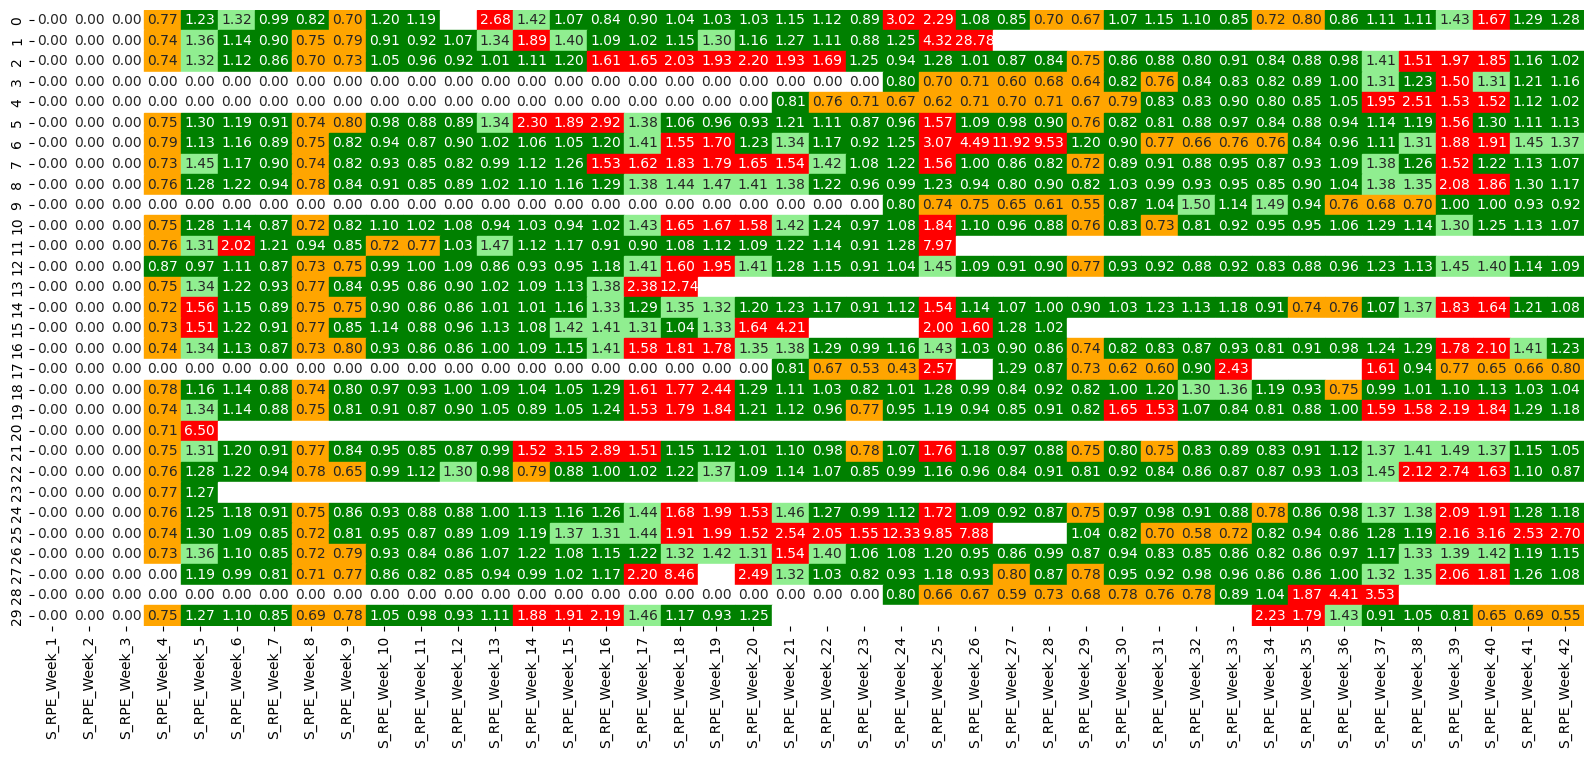

In [ ]:
def value_to_color(val):
    if val < 0.01 or val > 100: return 'white'  
    elif val < 0.8: return 'orange'
    elif val < 1.3: return 'green'
    elif val < 1.5: return 'lightgreen'
    elif val <= 50: return 'red'
    else: return 'white'  

color_matrix = acwr_emwa.applymap(value_to_color)

plt.figure(figsize=(20, 8))
sns.heatmap(acwr_emwa, cmap=ListedColormap(['white', 'orange', 'green', 'lightgreen', 'red']), annot=True, fmt=".2f", 
            mask=pd.isnull(acwr_emwa), cbar=False, linewidths=0.5, linecolor='grey',
            norm=BoundaryNorm([0, 0.01, 0.8, 1.3, 1.5, 50, 101], 6, clip=True))

for y in range(color_matrix.shape[0]):
    for x in range(color_matrix.shape[1]):
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=color_matrix.iloc[y, x]))
plt.xticks(ticks=np.arange(0.5, len(acwr_emwa.columns)), labels=acwr_emwa.columns, rotation=90)
plt.yticks(ticks=np.arange(0.5, len(acwr_emwa.index)), labels=acwr_emwa.index)
plt.show()


In [ ]:
output_path = r'C:\Users\emanu\Downloads\Output Task 1\acwr_emwa.xlsx'
acwr_emwa.to_excel(output_path, index=False)
print(f"ACWR (EMWA Model) saved to: {output_path}")

ACWR (EMWA Model) saved to: C:\Users\emanu\Downloads\Output Task 1\acwr_emwa.xlsx


In [ ]:
ma_window_size = 1  # Window size for moving average (e.g., 1 week)
acwr_ra = calculate_acwr_ra(weekly_AL, window_size=ma_window_size)
acwr_ra = pd.DataFrame(acwr_ra)
acwr_ra

C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\1190232809.py:3: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  chronic_workloads = acute_workloads.rolling(window=chronic_weeks, axis=1).mean()
C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\1190232809.py:4: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  ma_acute_workloads = acute_workloads.rolling(window=window_size, axis=1).mean()


,S_RPE_Week_1,S_RPE_Week_2,S_RPE_Week_3,S_RPE_Week_4,S_RPE_Week_5,S_RPE_Week_6,S_RPE_Week_7,S_RPE_Week_8,S_RPE_Week_9,S_RPE_Week_10,...,S_RPE_Week_33,S_RPE_Week_34,S_RPE_Week_35,S_RPE_Week_36,S_RPE_Week_37,S_RPE_Week_38,S_RPE_Week_39,S_RPE_Week_40,S_RPE_Week_41,S_RPE_Week_42
0,NaN,NaN,NaN,0.0,1.410475,3.350897,0.515625,1.278857,0.000000,0.000000,...,1.476312,0.546703,0.950547,0.670820,0.444444,0.629599,0.840883,0.764842,1.909664,0.154430
1,NaN,NaN,NaN,0.0,3.249799,2.318371,1.074772,0.929896,0.880952,1.086330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,3.170883,2.915275,0.592861,0.644825,0.949723,1.181766,...,1.338989,0.524813,0.833514,0.318225,0.342626,0.632724,1.678023,0.568047,2.511749,0.206015
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.177308,0.427883,0.970090,0.313415,0.913399,0.731164,1.301015,0.615728,1.610218,0.405063
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.387375,0.539656,0.000000,0.553790,0.677207,1.295238,1.593123,0.622222,2.086434,0.128440
5,NaN,NaN,NaN,0.0,2.683475,2.689953,0.649763,0.793030,1.368996,0.982215,...,1.307009,0.746397,1.040243,0.276345,0.601671,1.083181,0.931923,0.960422,1.562753,0.760060
6,NaN,NaN,NaN,0.0,2.626670,2.318729,0.766474,0.957716,1.195332,0.976400,...,0.926684,0.759720,0.923768,0.493746,0.243557,0.523883,1.208685,1.153639,1.353493,0.267297
7,NaN,NaN,NaN,0.0,3.266926,2.422990,0.776264,0.816386,1.486166,1.114683,...,1.164696,0.416548,0.972688,0.268337,0.976959,0.873515,1.213304,1.082147,1.390197,0.632776
8,NaN,NaN,NaN,0.0,2.691199,2.196836,0.912292,1.078313,1.262173,0.979024,...,1.195793,0.412604,1.065951,0.284722,0.350614,0.520275,1.713226,0.709184,1.977632,0.248127
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.057471,2.956916,2.587105,0.779104,0.592285,0.718382,1.243506,0.881811,1.515471,0.333208


C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\2595269533.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  color_matrix = acwr_ra.applymap(value_to_color)


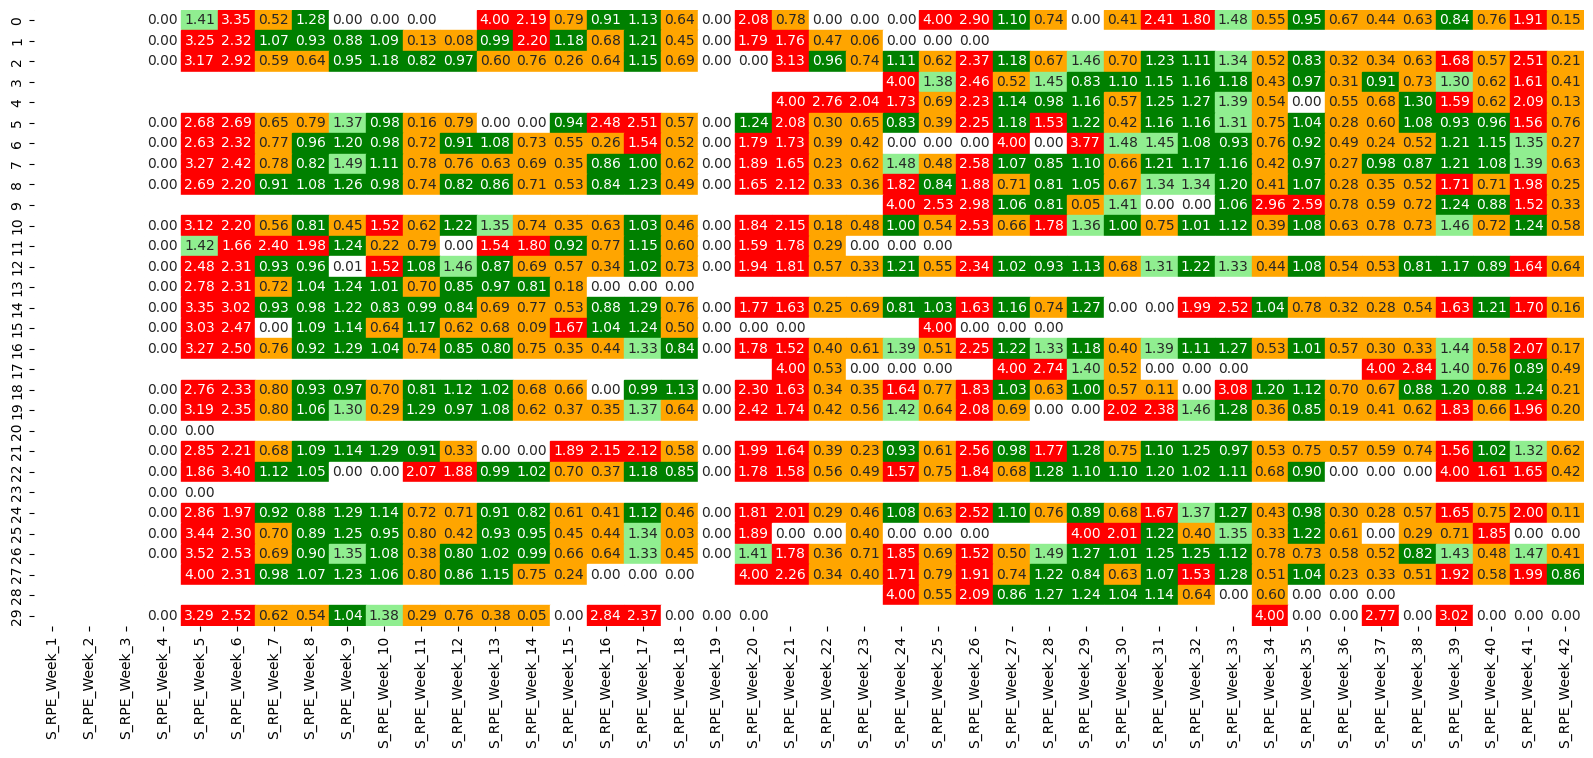

In [ ]:
color_matrix = acwr_ra.applymap(value_to_color)

plt.figure(figsize=(20, 8))
sns.heatmap(acwr_ra, cmap=ListedColormap(['white', 'orange', 'green', 'lightgreen', 'red']), annot=True, fmt=".2f", 
            mask=pd.isnull(acwr_ra), cbar=False, linewidths=0.5, linecolor='grey',
            norm=BoundaryNorm([0, 0.01, 0.8, 1.3, 1.5, 50, 101], 6, clip=True))

for y in range(color_matrix.shape[0]):
    for x in range(color_matrix.shape[1]):
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=color_matrix.iloc[y, x]))
plt.xticks(ticks=np.arange(0.5, len(acwr_ra.columns)), labels=acwr_ra.columns, rotation=90)
plt.yticks(ticks=np.arange(0.5, len(acwr_ra.index)), labels=acwr_ra.index)
plt.show()

In [ ]:
output_path = r'C:\Users\emanu\Downloads\Output Task 1\acwr_ma.xlsx'
acwr_ma.to_excel(output_path, index=False)
print(f"ACWR (MA Model) saved to: {output_path}")


ACWR (MA Model) saved to: C:\Users\emanu\Downloads\Output Task 1\acwr_ma.xlsx


Training Match Rateo:
We have in total 38 games (34 of championship, 4 of Cup). There are some training session that didn't bring to a preparation of a match (talking about week 4,9,13,32) so we need to remove it

In [ ]:
filtered_columns = ['IDNR'] + [col for col in df.columns if col.startswith('HSR_Week') or col.startswith('HSR_Match_')]
match_r_df = df[filtered_columns]
match_r_df = match_r_df.fillna(0)

In [ ]:
columns_to_remove = ['HSR_Week_4', 'HSR_Week_9', 'HSR_Week_13', 'HSR_Week_32']
match_r_df = match_r_df.drop(columns=columns_to_remove)

In [ ]:
columns = match_r_df.columns[1:]
training_match_ratio = []

for i in range(0, len(columns) - 1, 2):
    week_col = columns[i]
    match_col = columns[i + 1]
    ratio = match_r_df[week_col] / match_r_df[match_col]
    training_match_ratio.append(ratio)

ratio_df = pd.concat(training_match_ratio, axis=1)
ratio_df.columns = [f'Ratio_{i//2 + 1}' for i in range(0, len(columns) - 1, 2)]
ratio_df.insert(0, 'IDNR', df['IDNR'])
ratio_df = ratio_df.fillna(0)

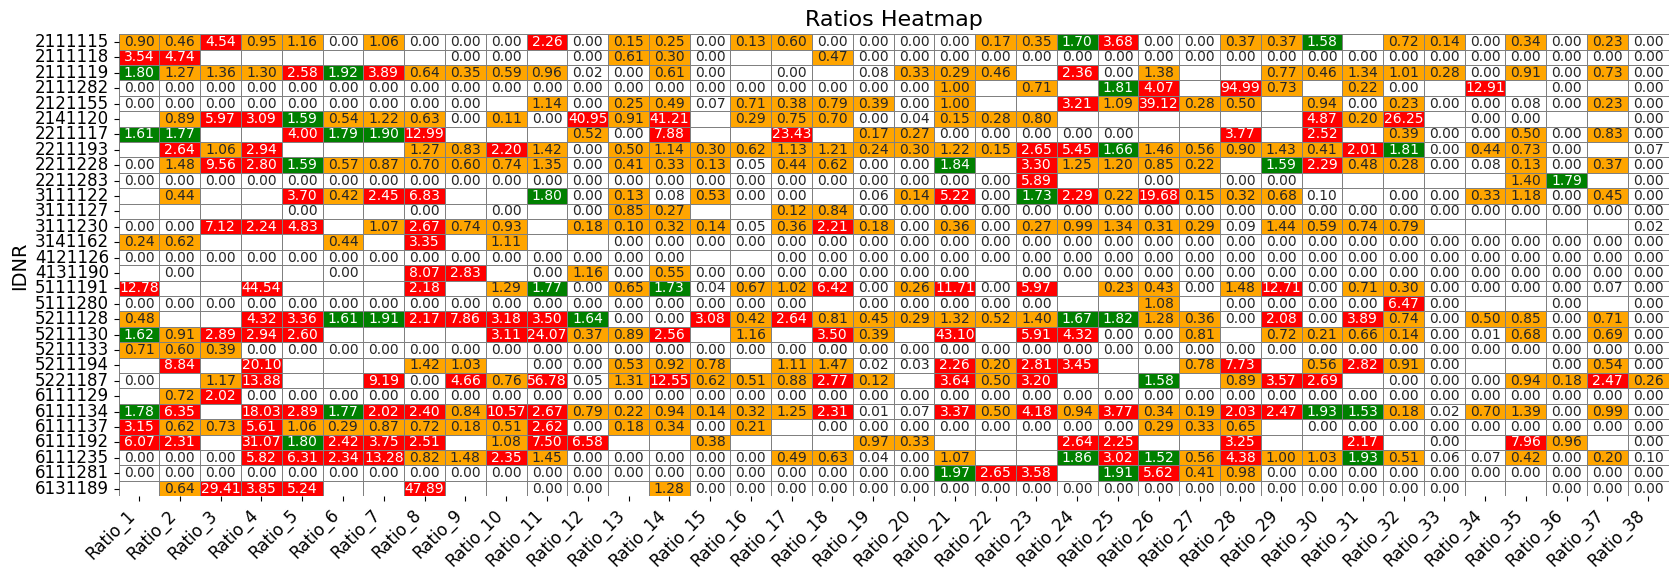

,Ratio_1,Ratio_2,Ratio_3,Ratio_4,Ratio_5,Ratio_6,Ratio_7,Ratio_8,Ratio_9,Ratio_10,...,Ratio_29,Ratio_30,Ratio_31,Ratio_32,Ratio_33,Ratio_34,Ratio_35,Ratio_36,Ratio_37,Ratio_38
IDNR,,,,,,,,,,,,,,,,,,,,,
2111115,0.897159,0.459085,4.538986,0.950969,1.160922,0.000000,1.056435,0.000000,0.000000,0.000000,...,0.367174,1.582286,inf,0.719216,0.139279,0.000000,0.339697,0.000000,0.229154,0.000000
2111118,3.540132,4.739313,inf,inf,inf,inf,inf,inf,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2111119,1.799405,1.273433,1.357844,1.297100,2.579478,1.917605,3.889254,0.642702,0.346745,0.589180,...,0.774755,0.455245,1.337865,1.006965,0.283832,0.000000,0.911041,0.000000,0.731008,0.000000
2111282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.729179,inf,0.217042,0.000000,inf,12.910843,inf,0.000000,inf,0.000000
2121155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,...,inf,0.944108,0.000000,0.234857,0.000000,0.000000,0.079418,0.000000,0.229098,0.000000
2141120,inf,0.886176,5.965264,3.087263,1.588758,0.539501,1.219351,0.625374,0.000000,0.107738,...,inf,4.869979,0.202358,26.253731,inf,0.000000,0.000000,inf,inf,0.000000
2211117,1.612508,1.772356,inf,inf,3.999274,1.787409,1.897808,12.991642,inf,inf,...,inf,2.516159,inf,0.391903,0.000000,0.000000,0.498394,0.000000,0.828536,0.000000
2211193,inf,2.642612,1.064746,2.939399,inf,inf,inf,1.272397,0.825664,2.197597,...,1.433942,0.414110,2.011908,1.814983,0.000000,0.436701,0.728579,0.000000,inf,0.072009
2211228,0.000000,1.479248,9.563919,2.802941,1.593519,0.573566,0.874589,0.701712,0.597674,0.742570,...,1.593565,2.290054,0.477595,0.280825,0.000000,0.077470,0.130264,0.000000,0.368679,0.000000


In [ ]:
colors = ['white', 'orange', 'green', 'red', 'black']
cmap = ListedColormap(colors)

boundaries = [0, 0.1, 1.5, 2, 100, np.inf]
norm = BoundaryNorm(boundaries, len(colors), clip=True)

ratio_df.set_index('IDNR', inplace=True)

plt.figure(figsize=(20, 6))
sns.heatmap(ratio_df, cmap=cmap, norm=norm, annot=True, linewidths=.5, linecolor='grey', cbar=False, fmt=".2f")

plt.title('Ratios Heatmap', fontsize=16)
plt.ylabel('IDNR', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()
ratio_df

In [ ]:
output_path = r'C:\Users\emanu\Downloads\Output Task 1\Training_Match_Rateo.xlsx'
ratio_df.to_excel(output_path, index=False)
print(f"Training_Match_Rateo saved to: {output_path}")

Training_Match_Rateo saved to: C:\Users\emanu\Downloads\Output Task 1\Training_Match_Rateo.xlsx


HSR results depends mainly by the time a player trains or plays during the match. Results may be misleading so we divide each results by the number of minutes played

In [ ]:
filtered_columns = ['IDNR'] + [col for col in df.columns if col.startswith('HSR_Week') or col.startswith('HSR_Match_')]
match_r_df = df[filtered_columns]
match_r_df = match_r_df.fillna(0)

In [ ]:
previous_weekly_acute_load = 0  
workload_dfs = {}  
previous_time = 0

for week_number in range(1, 43):  # Weeks 1 to 42
    week_df_name = f'week_{week_number}_df'
    week_df = eval(week_df_name)  

    columns_to_drop = [col for col in week_df.columns if col.startswith('S_RPE_Week_')]
    week_df.drop(columns=columns_to_drop, inplace=True)
    week_df.update(week_df.filter(like='S_RPE_').fillna(0))

    weekly_acute_load = week_df.filter(like='S_RPE_').sum(axis=1)
    week_over_week_load_change = weekly_acute_load - previous_weekly_acute_load  

    session_time_columns = week_df.filter(like='Time_Session_')
    total_session_time_for_week = session_time_columns.sum(axis=1)
    change_in_session_time_for_week = total_session_time_for_week - previous_time
    
    previous_weekly_acute_load = weekly_acute_load
    previous_time = total_session_time_for_week
    data = {
        "Player ID": week_df["IDNR"],
        "Weekly Acute Load": week_over_week_load_change,
        "Total Session Time for Week": change_in_session_time_for_week  
    }
    workload_df = pd.DataFrame(data)
    
    workload_dfs[week_number] = workload_df

for week_number, workload_df in workload_dfs.items():
    workload_dfs[week_number] = workload_df.fillna(0)

#workload_dfs[1] to see first week

In [ ]:
dfs_list = []

for week_number, df in workload_dfs.items():
    df['Week'] = week_number  
    dfs_list.append(df)
work_time_df = pd.concat(dfs_list, ignore_index=True)
work_time_df.set_index(['Player ID', 'Week'], inplace=True)
work_time_df.sort_index(inplace=True)

In [ ]:
work_time_df = work_time_df.reset_index()

In [ ]:
work_time_df['Load per Minute Training'] = work_time_df['Weekly Acute Load'] / work_time_df['Total Session Time for Week']
filtered_df = work_time_df.fillna(0)

In [ ]:
file_path = r'C:/Users/emanu/Downloads/Player_dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='RPE + GPS High Speed Running')
print(df.head())

      IDNR  Sectorial_Position  Specific_Position  Time_Session_1  RPE_1  \
0  2111115                   1                  1             NaN    NaN   
1  2111118                   1                  1             NaN    NaN   
2  2111119                   1                  1             NaN    NaN   
3  2111282                   1                  1             NaN    NaN   
4  2121155                   1                  1             NaN    NaN   

   S_RPE_1  Time_Session_2  RPE_2  S_RPE_2  Time_Session_3  ...  HSR_Week_41  \
0      NaN             NaN    NaN      NaN            96.0  ...         7.53   
1      NaN             NaN    NaN      NaN            96.0  ...         0.00   
2      NaN             NaN    NaN      NaN            96.0  ...        90.55   
3      NaN             NaN    NaN      NaN             NaN  ...        39.80   
4      NaN             NaN    NaN      NaN             NaN  ...        26.99   

   Part_Match_33_Championship  Time_Match_33_Championship  \
0

In [ ]:
filtered_columns = ['IDNR'] + [col for col in df.columns if col.startswith('HSR_Match_') or col.startswith('Time_Match_')]
match_df = df[filtered_columns]
match_df = match_df.fillna(0)

In [ ]:
time_columns = [col for col in match_df.columns if col.startswith('Time_Match')]
hsr_columns = [col for col in match_df.columns if col.startswith('HSR_Match')]

for i in range(len(time_columns)):
    time_col = time_columns[i]
    hsr_col = hsr_columns[i]
    ratio_col = f'HSR_Time_Ratio_{i+1}'  
    
    match_df[ratio_col] = match_df[hsr_col] / match_df[time_col]

columns_to_remove = [col for col in match_df.columns if col.startswith('Time_Match') or col.startswith('HSR_Match')]
match_df.drop(columns=columns_to_remove, inplace=True)
match_df = match_df.fillna(0)

In [ ]:
match_df.rename(columns={'IDNR': 'Player ID'}, inplace=True)
# Assuming match_df is your DataFrame and it has been renamed 'Player ID' column
# Melt match_df to long format
match_df_long = match_df.melt(id_vars=['Player ID'], var_name='Match', value_name='HSR_Time_Ratio')

# Extract match number and create a 'Week' column
match_df_long['Week'] = match_df_long['Match'].str.extract('(\d+)$').astype(int)

# Drop the 'Match' column as it's no longer needed
match_df_long.drop(columns=['Match'], inplace=True)



<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\4257755658.py:7: SyntaxWarning: invalid escape sequence '\d'
  match_df_long['Week'] = match_df_long['Match'].str.extract('(\d+)$').astype(int)


In [ ]:
merged_df = pd.merge(work_time_df, match_df_long, on=['Player ID', 'Week'], how='inner')
merged_df = merged_df.drop_duplicates()
merged_df.drop(columns=['index'], inplace=True)
merged_df = merged_df.fillna(0)

In [ ]:
merged_df['Training Match Rateo'] = merged_df['Load per Minute Training'] / merged_df['HSR_Time_Ratio']
merged_df = merged_df.fillna(0)

C:\Users\emanu\AppData\Local\Temp\ipykernel_14996\601919273.py:11: FutureWarning: The provided callable <function mean at 0x00000239C56CD1C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_df = merged_df.pivot_table(index='Player ID', columns='Week', values='Training Match Rateo', aggfunc=np.mean)


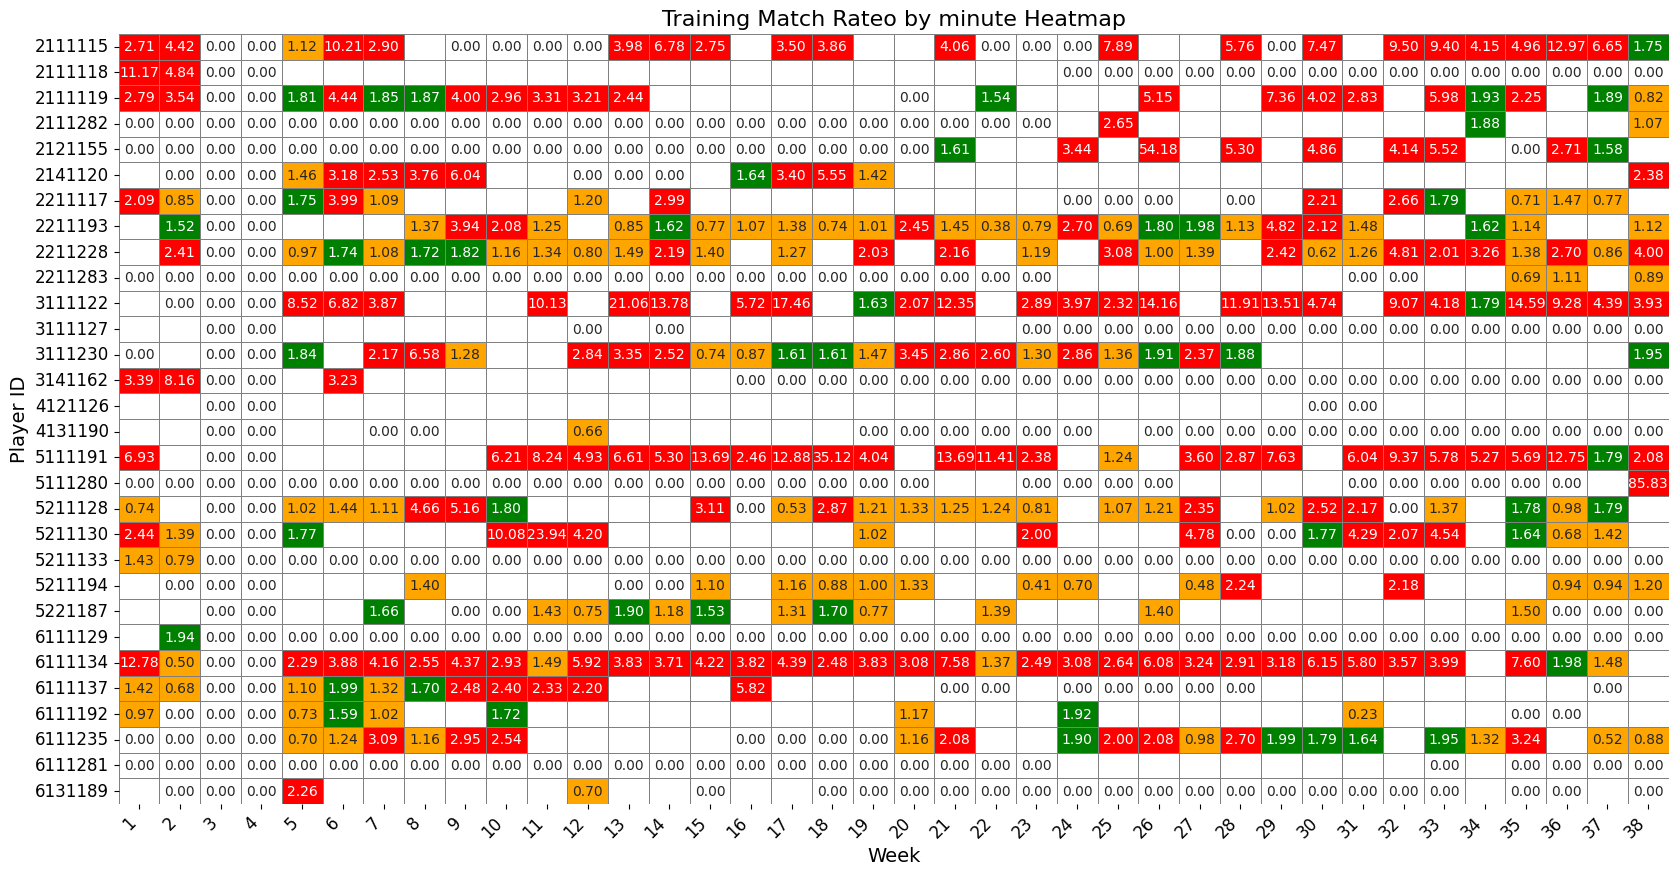

In [ ]:
pivot_df = merged_df.pivot_table(index='Player ID', columns='Week', values='Training Match Rateo', aggfunc=np.mean)

colors = ['white', 'orange', 'green', 'red', 'black']
cmap = ListedColormap(colors)

boundaries = [0, 0.1, 1.5, 2, 100, np.inf]
norm = BoundaryNorm(boundaries, cmap.N, clip=True)

plt.figure(figsize=(20, 10))  # Adjust figure size as needed
sns.heatmap(pivot_df, cmap=cmap, norm=norm, annot=True, linewidths=.5, linecolor='grey', cbar=False, fmt=".2f")

plt.title('Training Match Rateo by minute Heatmap', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Player ID', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [ ]:
output_path = r'C:\Users\emanu\Downloads\Output Task 1\Training_Match_Rateo_by_minute.xlsx'
merged_df.to_excel(output_path, index=False)
print(f"Training_Match_Rateo_by_minute saved to: {output_path}")

Training_Match_Rateo_by_minute saved to: C:\Users\emanu\Downloads\Output Task 1\Training_Match_Rateo_by_minute.xlsx
